In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
#matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
#matplotlib.style.use('ggplot')
import seaborn as sns; sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

# __Origem e Destino__

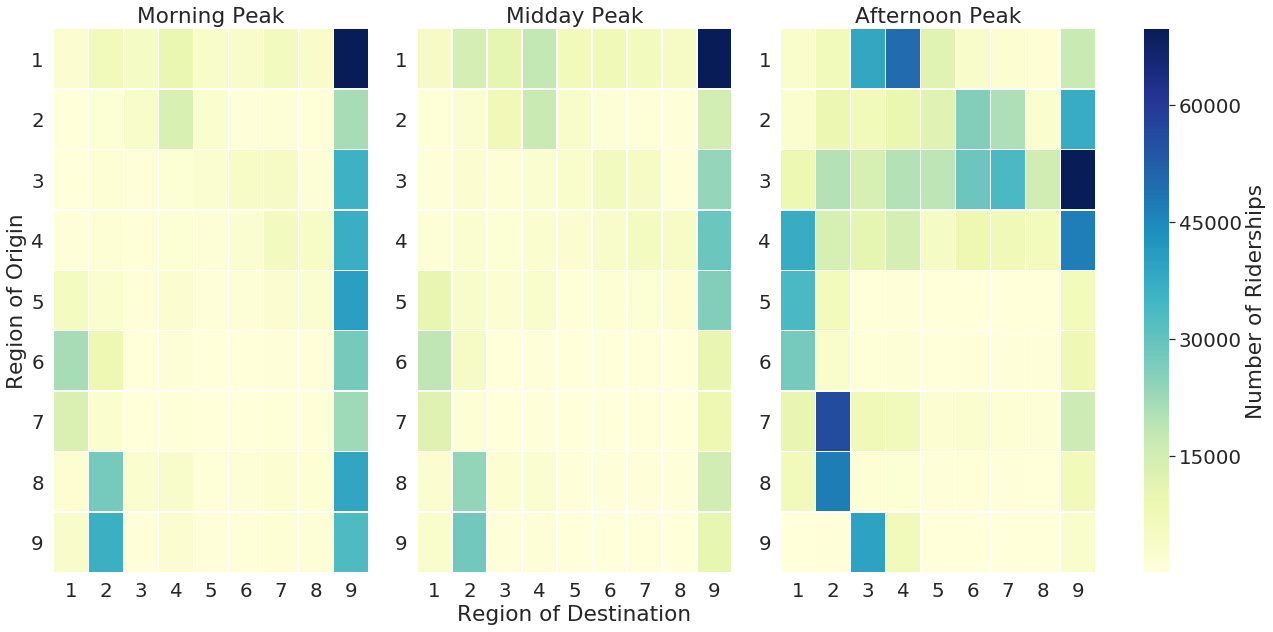

In [27]:
# https://stackoverflow.com/questions/42712304/seaborn-heatmap-subplots-keep-axis-ratio-consistent
# Regioes de Sao Paulo
names = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

m_am = [[3441,10823,7503,14912,5498,5322,9276,5837,106801],
        [470,2503,5923,21103,4209,1072,1922,1455,32841],
        [369,2250,1009,2558,3749,6685,7293,1610,54965],
        [983,2061,1373,2429,1663,3940,9132,6547,56070],
        [8229,4329,1529,3637,1064,1724,3605,3986,61594],
        [32829,12800,425,1915,364,321,842,1146,42253],
        [20333,4278,407,1475,318,445,1300,1423,34504],
        [3158,42635,4099,5713,1414,1837,2987,2387,59459],
        [5547,55897,1038,3293,1051,1337,2373,1953,50961]]

m_entre = [[7216,22895,16819,28156,10498,11830,9863,7257,108873],
           [1203,3639,11497,26169,5361,1561,1214,920,23118],
           [736,3472,1975,3771,4870,9310,7358,1375,36828],
           [1601,3721,2486,4116,3343,5463,8686,6241,45242],
           [15546,5539,2814,4879,1232,1953,2389,2995,40224],
           [28866,6999,163,706,142,150,208,313,15609],
           [19082,2256,198,645,138,169,295,329,12936],
           [3531,37404,3092,3756,779,922,909,687,23727],
           [4597,43795,590,1431,383,342,416,384,16140]]

m_tarde = [[3274,7157,38481,49995,11931,3355,1892,1367,16915],
           [2763,9174,6997,9517,11891,25778,20620,2640,37307],
           [8691,19872,14033,19705,18616,28754,33609,15257,69850],
           [37197,14212,10713,14650,4736,8443,7393,6564,46760],
           [33782,6359,238,507,102,157,134,161,6592],
           [27652,2860,831,1119,239,566,491,389,8228],
           [10017,55997,7205,6857,1753,2563,1427,1094,16215],
           [6881,47182,1245,1592,434,780,383,290,6819],
           [84,586,39738,6938,262,140,119,76,3207]]

# gráficos
plt.rcParams["figure.figsize"]=20,10
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw={'width_ratios':[1,1,1,0.08]})
ax1.get_shared_y_axes().join(ax2,ax3)
ax1 = sns.heatmap(m_am,cmap="YlGnBu",ax=ax1, cbar=False,linewidths=.5)
ax1.set_ylabel('Region of Origin')
ax1.set_xlabel('')
ax2 = sns.heatmap(m_entre,cmap="YlGnBu",ax=ax2, cbar=False,linewidths=.5)
ax2.set_ylabel('')
ax2.set_xlabel('Region of Destination')
ax3 = sns.heatmap(m_tarde,cmap="YlGnBu",ax=ax3,linewidths=.5, cbar_ax=ax4, cbar_kws={'label': 'Number of Riderships'})
ax3.set_ylabel('')
ax3.set_xlabel('')

# titles
ax1.title.set_text('Morning Peak')
ax2.title.set_text('Midday Peak')
ax3.title.set_text('Afternoon Peak')

# eixos - y
ax1.set_yticklabels(names,rotation='horizontal')
ax2.set_yticklabels(names,rotation='horizontal')
ax3.set_yticklabels(names,rotation='horizontal')

# eixo - x
ax1.set_xticklabels(names,rotation='horizontal')
ax2.set_xticklabels(names,rotation='horizontal')
ax3.set_xticklabels(names,rotation='horizontal')

# font size
sns.set(font_scale=1.8)

plt.savefig("OD_pico.pdf",format="pdf")

plt.show()
